In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append('../../')
import satpass

In [13]:
# domain = [147.5,158,-58,-52.5]

domain = (145,160,-59,-51)
x_domain = [domain[0], domain[1], domain[1], domain[0], domain[0]]
y_domain = [domain[2], domain[2], domain[3], domain[3], domain[2]]

In [15]:
s3b = satpass.NominalTrack(mission='s3b')
s3a = satpass.NominalTrack(mission='s3a')
j3 = satpass.NominalTrack(mission='j3')
sw = satpass.NominalTrack(mission='sw')
swi = satpass.NominalTrack(mission='swi')

### Spatial selection

##### SWOT passages in the area


In [18]:
#### Science phase

tracks = sw.select_in_area(domain)
tracks

,track,lon,lat
1873,4,153.271524,-51.101563
1874,4,153.444136,-51.444395
1875,4,153.619779,-51.786936
1876,4,153.798474,-52.129058
1877,4,153.980331,-52.470806
...,...,...,...
276553,560,158.909141,-56.538602
276554,560,159.141034,-56.874411
276555,560,159.377588,-57.209657
276556,560,159.618940,-57.544324


In [19]:
### Fast sampling phase

tracks = swi.select_in_area(domain)
tracks

,track,lon,lat
1781,6,150.245509,-51.299117
1782,6,150.527279,-51.848643
1783,6,150.817001,-52.397189
1784,6,151.115023,-52.944715
1785,6,151.421708,-53.491178
1786,6,151.737441,-54.036533
1787,6,152.062628,-54.580732
1788,6,152.397698,-55.123724
1789,6,152.743102,-55.665455
1790,6,153.099321,-56.205867


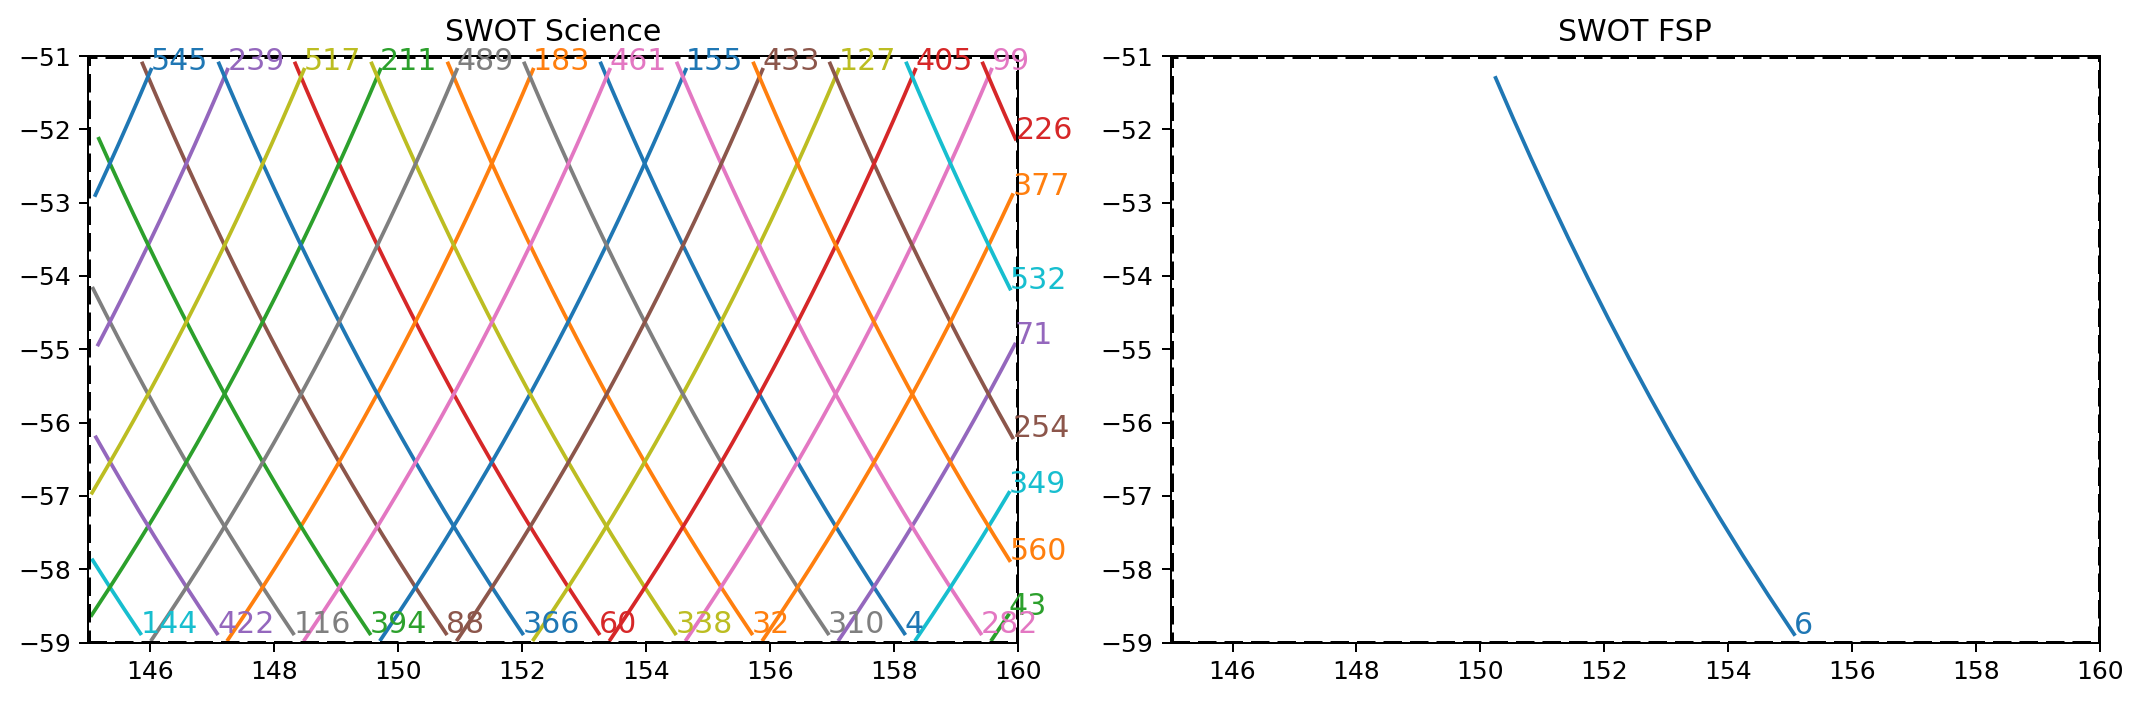

In [20]:
plt.figure(figsize = (12, 4), dpi = 180)

plt.subplot(121)
tracks = sw.select_in_area(domain)

for n in np.unique(tracks.track):
    
    track = tracks[tracks.track == n]
    im =plt.plot(track.lon, track.lat)[0]
    c = im.get_color()
    plt.text(track.lon.values[-1], track.lat.values[-1], n, c = c, fontsize = 12)

plt.plot(x_domain, y_domain, lw = 2, c = 'k', ls = '--')

plt.title('SWOT Science')
plt.xlim(domain[:2])
plt.ylim(domain[2:])

plt.subplot(122)
tracks = swi.select_in_area(domain)

for n in np.unique(tracks.track):
    
    track = tracks[tracks.track == n]
    im =plt.plot(track.lon, track.lat)[0]
    c = im.get_color()
    plt.text(track.lon.values[-1], track.lat.values[-1], n, c = c, fontsize = 12)

plt.plot(x_domain, y_domain, lw = 2, c = 'k', ls = '--')

plt.title('SWOT FSP')

plt.xlim(domain[:2])
plt.ylim(domain[2:])

plt.tight_layout()

### Spatio-temporal selection

#### Basic usage

In [22]:
nt = sw
date_range = [pd.Timestamp('2023-11-11'), pd.Timestamp('2023-11-17')]
DF = satpass.sat_pass('sw', date_range, domain)

DF

,track,direction,cycle,time
2023-11-11 01:34:00,239,asc,6.0,2023-11-11 01:34:00
2023-11-11 14:57:00,254,des,6.0,2023-11-11 14:57:00
2023-11-12 14:58:00,282,des,6.0,2023-11-12 14:58:00
2023-11-13 14:58:00,310,des,6.0,2023-11-13 14:58:00
2023-11-14 14:59:00,338,des,6.0,2023-11-14 14:59:00
2023-11-14 23:51:00,349,asc,6.0,2023-11-14 23:51:00
2023-11-15 14:59:00,366,des,6.0,2023-11-15 14:59:00
2023-11-15 23:53:00,377,asc,6.0,2023-11-15 23:53:00
2023-11-16 15:00:00,394,des,6.0,2023-11-16 15:00:00
2023-11-16 23:53:00,405,asc,6.0,2023-11-16 23:53:00


#### Exemple : application to FOCUS campaign

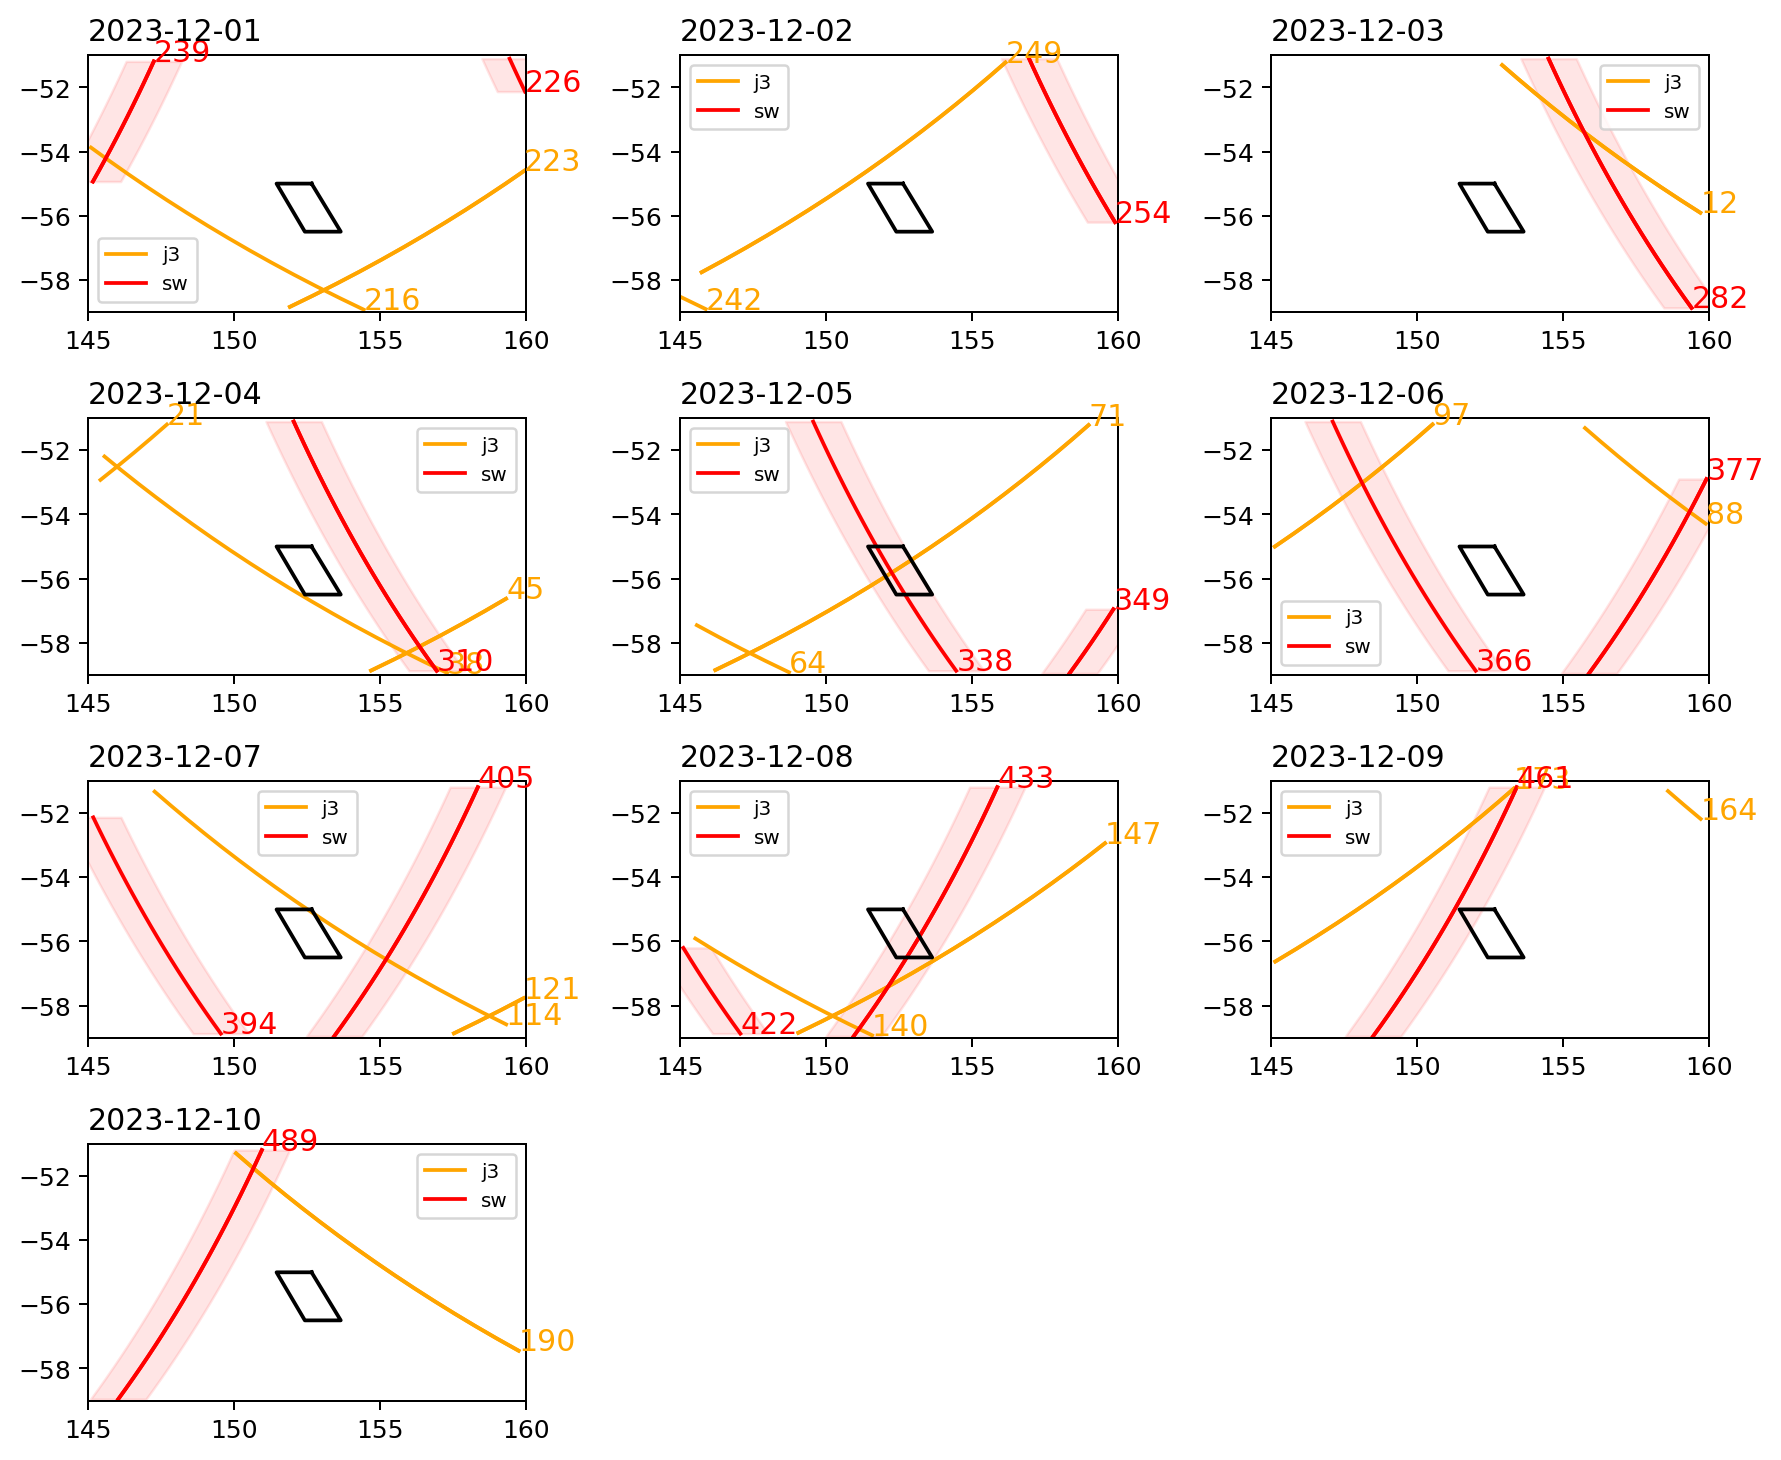

In [9]:
s3b = satpass.NominalTrack(mission='s3b')
s3a = satpass.NominalTrack(mission='s3a')
j3 = satpass.NominalTrack(mission='j3')
sw = satpass.NominalTrack(mission='sw')

date_range = pd.date_range('2023-12-01', '2023-12-10')
k = 0
colors = ['orange', 'r']

plt.figure(figsize = (10,10), dpi = 180)
for t in date_range:
    k+=1
    plt.subplot(5, int(len(date_range)/5 +1), k)
    plt.title(t.date(), loc = 'left')
    date = pd.DatetimeIndex([t, t + pd.Timedelta(hours = 24)]).tz_localize(None)
#     date_eph = pd.DatetimeIndex([pd.Timestamp(date[0]), date[1]])

    for i, m in enumerate(['j3', 'sw']):
        c = colors[i]
        nt = satpass.NominalTrack(mission=m)
        DF = satpass.sat_pass(nt, date, domain)
        tracks = nt.select_in_area(domain)
        for n in np.unique(DF.track):
            track = tracks[tracks.track == n]
            if track.any().lon:
                plt.plot(track.lon, track.lat, c = c)
                plt.text(track.lon.values[-1], track.lat.values[-1], n, c = c, fontsize = 12)
    
                if m == 'sw':
                    plt.fill_betweenx(track.lat, track.lon -0.95, track.lon +0.95, color = c, alpha = 0.1)
        plt.plot(track.lon, track.lat, c = c, label = m)
#         plt.text(track.lon.values[-1], track.lat.values[-1], n, c = c, fontsize = 12)    

#         pass
    plt.xlim(domain[:2])
    plt.ylim(domain[2:])
    plt.plot(waypoints[0], waypoints[1], c = 'k')
    plt.legend(fontsize = 8)
    
plt.tight_layout()

#### Exemple : Application to SWOT ascending/descending subcycles (4 per 21 days cycle)

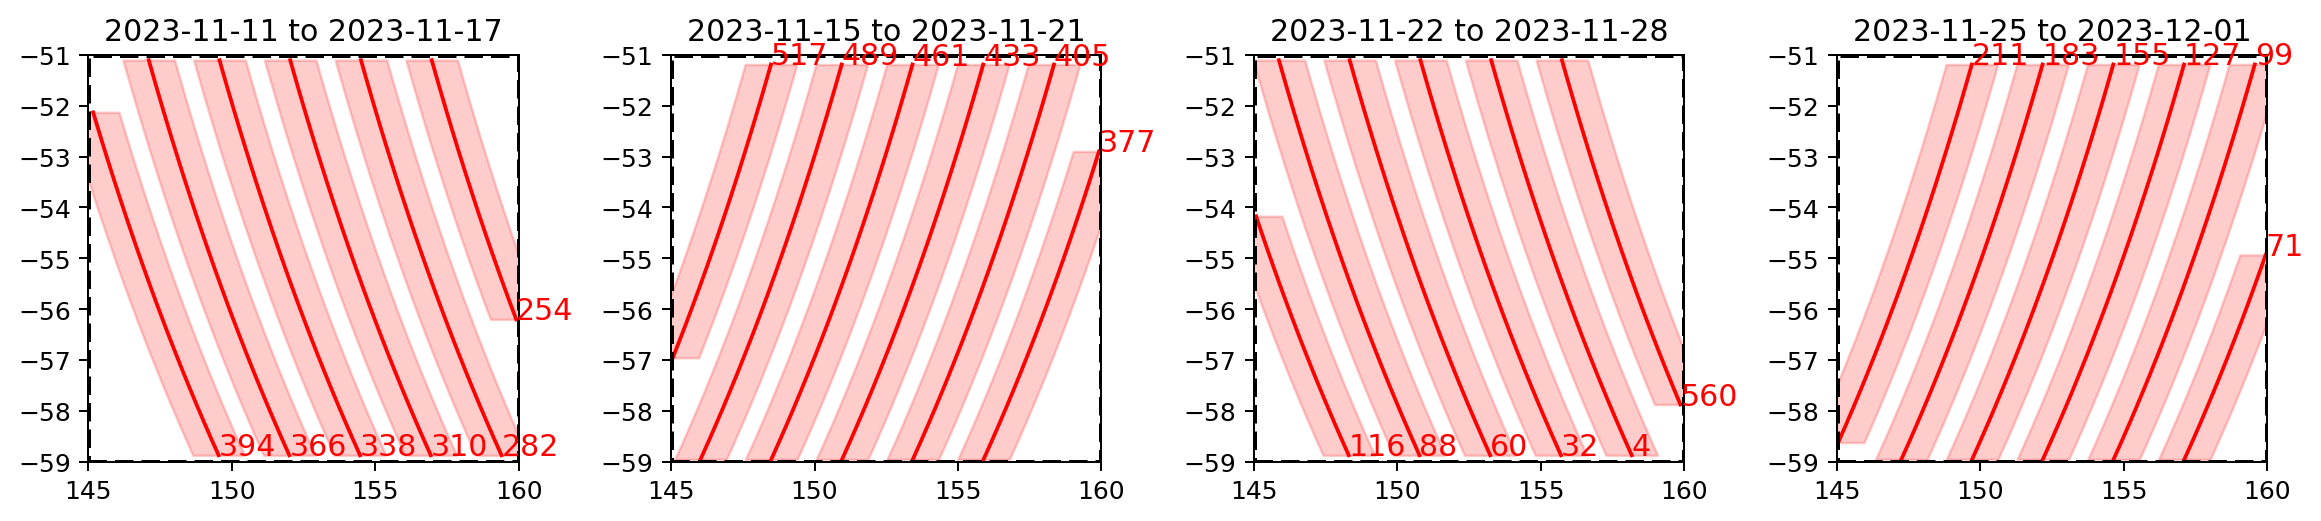

In [10]:
nt = sw

plt.figure(figsize = (13,3), dpi = 180)

date_range = [pd.Timestamp('2023-11-11'), pd.Timestamp('2023-11-17')]
plt.subplot(141)
DF = satpass.sat_pass(nt, date_range, domain)
DF = DF[DF.direction == 'des']

n_tracks, dct = nt.get_tracks(area = domain)
for track in np.unique(DF.track):
    x, y, dt = np.array(dct[track]).T
    plt.plot(x, y, c = 'r')
    plt.fill_betweenx((y).astype(float), (x).astype(float) - 0.9,(x).astype(float)+0.9, color = 'r', alpha = 0.2)
    plt.text(x[-1], y[-1], track, c = 'r', fontsize = 12)

plt.title(f'{date_range[0].date()} to {date_range[1].date()}')
plt.plot(x_domain, y_domain, lw = 2, c = 'k', ls = '--')
plt.xlim(domain[:2])
plt.ylim(domain[2:])

############

date_range = [pd.Timestamp('2023-11-15'), pd.Timestamp('2023-11-21')]
plt.subplot(142)
DF = satpass.sat_pass(nt, date_range, domain)
DF = DF[DF.direction == 'asc']

n_tracks, dct = nt.get_tracks(area = domain)
for track in np.unique(DF.track):
    x, y, dt = np.array(dct[track]).T
    plt.plot(x, y, c = 'r')
    plt.fill_betweenx((y).astype(float), (x).astype(float) - 0.9,(x).astype(float)+0.9, color = 'r', alpha = 0.2)
    plt.text(x[-1], y[-1], track, c = 'r', fontsize = 12)

plt.title(f'{date_range[0].date()} to {date_range[1].date()}')
plt.plot(x_domain, y_domain, lw = 2, c = 'k', ls = '--')
plt.xlim(domain[:2])
plt.ylim(domain[2:])

##############

date_range = [pd.Timestamp('2023-11-22'), pd.Timestamp('2023-11-28')]
plt.subplot(143)
DF = satpass.sat_pass(nt, date_range, domain)
DF = DF[DF.direction == 'des']

n_tracks, dct = nt.get_tracks(area = domain)
for track in np.unique(DF.track):
    x, y, dt = np.array(dct[track]).T
    plt.plot(x, y, c = 'r')
    plt.fill_betweenx((y).astype(float), (x).astype(float) - 0.9,(x).astype(float)+0.9, color = 'r', alpha = 0.2)
    plt.text(x[-1], y[-1], track, c = 'r', fontsize = 12)

plt.title(f'{date_range[0].date()} to {date_range[1].date()}')
plt.plot(x_domain, y_domain, lw = 2, c = 'k', ls = '--')
plt.xlim(domain[:2])
plt.ylim(domain[2:])

#############

date_range = [pd.Timestamp('2023-11-25'), pd.Timestamp('2023-12-01')]
plt.subplot(144)
DF = satpass.sat_pass(nt, date_range, domain)
DF = DF[DF.direction == 'asc']
n_tracks, dct = nt.get_tracks(area = domain)
for track in np.unique(DF.track):
    x, y, dt = np.array(dct[track]).T
    plt.plot(x, y, c = 'r')
    plt.fill_betweenx((y).astype(float), (x).astype(float) - 0.9,(x).astype(float)+0.9, color = 'r', alpha = 0.2)
    plt.text(x[-1], y[-1], track, c = 'r', fontsize = 12)

plt.title(f'{date_range[0].date()} to {date_range[1].date()}')
plt.plot(x_domain, y_domain, lw = 2, c = 'k', ls = '--')
plt.xlim(domain[:2])
plt.ylim(domain[2:])

plt.tight_layout()